In [1]:
# Importing nessesories libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "students_performance_raw.csv"
df = pd.read_csv(file_path)

In [6]:
# Displaying basic information abount the dataset
basic_info = df.info()
head_data = df.head()
basic_info
head_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes
print(missing_values)
data_types

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
# Checking for duplicates rows
duplicates_rows = df.duplicated().sum()
duplicates_rows

0

In [9]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 * Columns Overview:
  1.gender -	Student's gender
  2.race/ethnicity	-	Ethnic group (Group A to E)
  3.parental level of education	-	Parent's highest level of education
  4.lunch	-	Lunch type (standard or free/reduced)
  5.test preparation course	-	Whether student completed test prep course
  6.math score	-	Math score out of 100
  7.reading score	-	Reading score out of 100
  8.writing score	-	Writing score out of 100


The data set have 1000 students records
There are no missing values
There are no duplicates values
There are 5 categorical and 3 numeric fields


In [14]:
# Rename columns to be more Pythonic and easier to work with
df = df.rename(columns={
    'gender': 'Gender',
    'race/ethnicity': 'Ethnicity',
    'parental level of education': 'Parental_Education',
    'lunch': 'Lunch',
    'test preparation course': 'Test_Preparation',
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score'
})


In [15]:
df.head()

,Gender,Ethnicity,Parental_Education,Lunch,Test_Preparation,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


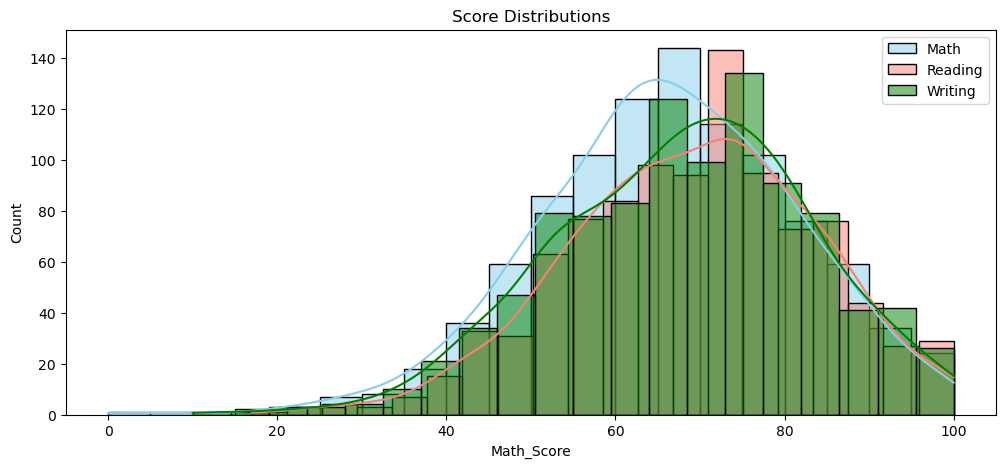

In [16]:
# 1. Distribution of Math, Reading, and Writing Scores
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned['Math_Score'], kde=True, color='skyblue', label='Math', bins=20)
sns.histplot(df_cleaned['Reading_Score'], kde=True, color='salmon', label='Reading', bins=20)
sns.histplot(df_cleaned['Writing_Score'], kde=True, color='green', label='Writing', bins=20)
plt.legend()
plt.title('Score Distributions')
plt.show()

1. Score Distributions
 * All three subjects (Math, Reading, Writing) have roughly normal distributions.

 * Math scores are slightly more spread out with a few low outliers.

<Figure size 1500x800 with 0 Axes>

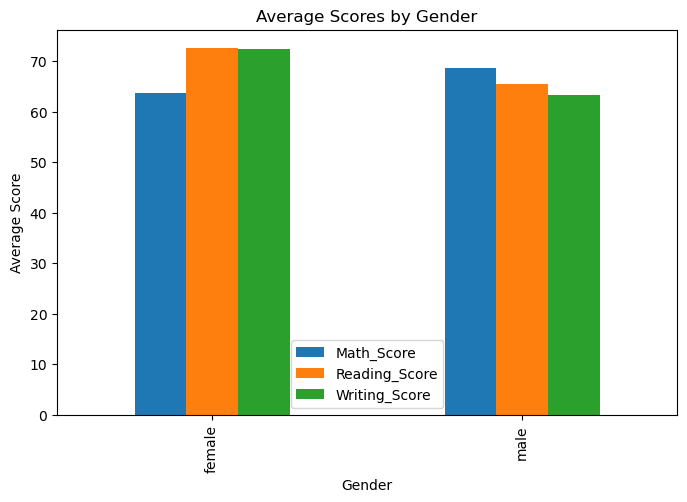

In [17]:
# 2. Average Scores by Gender
plt.figure(figsize=(15, 8))
score_means_by_gender = df_cleaned.groupby("Gender")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().reset_index()
score_means_by_gender.plot(x="Gender", kind="bar", figsize=(8, 5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

2. Average Scores by Gender
 * Females outperform males in Reading and Writing.

 * Males slightly outperform females in Math.

<Figure size 800x500 with 0 Axes>

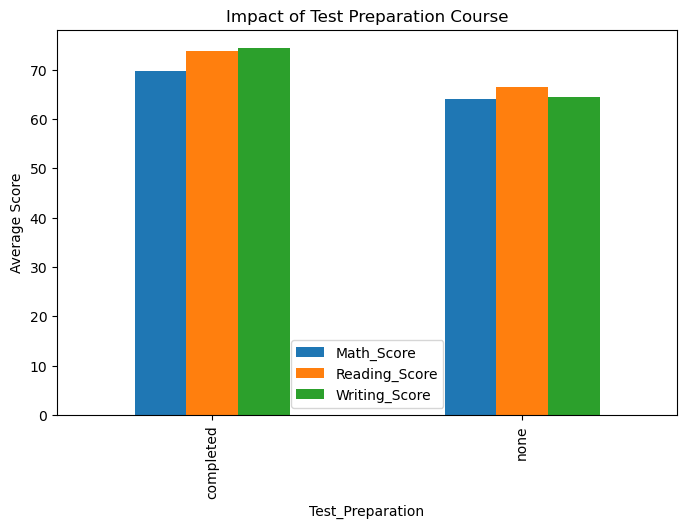

In [18]:
# 3. Test Preparation Course Impact
plt.figure(figsize=(8, 5))
df_cleaned.groupby("Test_Preparation")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().plot(kind='bar', figsize=(8, 5))
plt.title("Impact of Test Preparation Course")
plt.ylabel("Average Score")
plt.show()

3. Test Preparation Impact
 * Students who completed the test preparation course score significantly higher across all subjects.

<Figure size 1000x500 with 0 Axes>

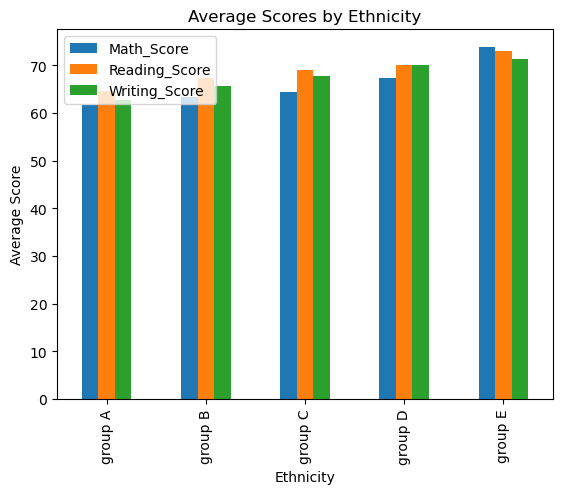

In [19]:
# 4. Scores by Race/Ethnicity
plt.figure(figsize=(10, 5))
df.groupby("Ethnicity")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().plot(kind='bar')
plt.title("Average Scores by Ethnicity")
plt.ylabel("Average Score")
plt.show()

4. Scores by Ethnicity
 * Group E performs the best on average across all subjects.

 * Group A performs the lowest, suggesting potential educational inequality.

<Figure size 1200x600 with 0 Axes>

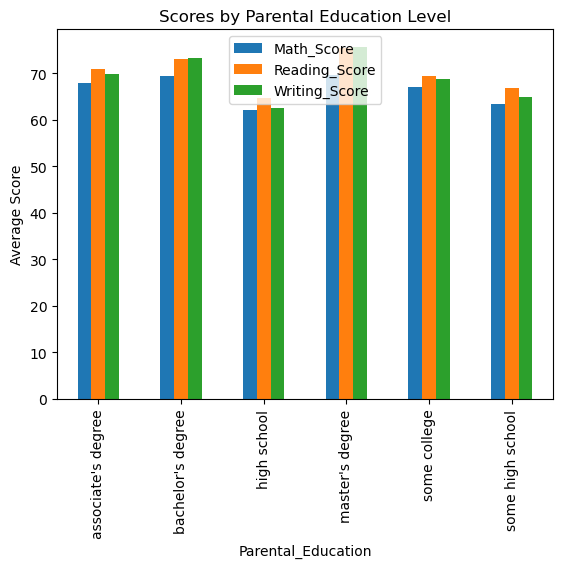

In [22]:
# 5. Parental Education Influence
plt.figure(figsize=(12, 6))
df.groupby("Parental_Education")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().plot(kind='bar')
plt.title("Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.show()

5. Parental Education Influence
 * Students with parents holding Master’s or Bachelor’s degrees have higher average scores.

 * Educational background of parents appears to have a strong positive influence.

<Figure size 800x500 with 0 Axes>

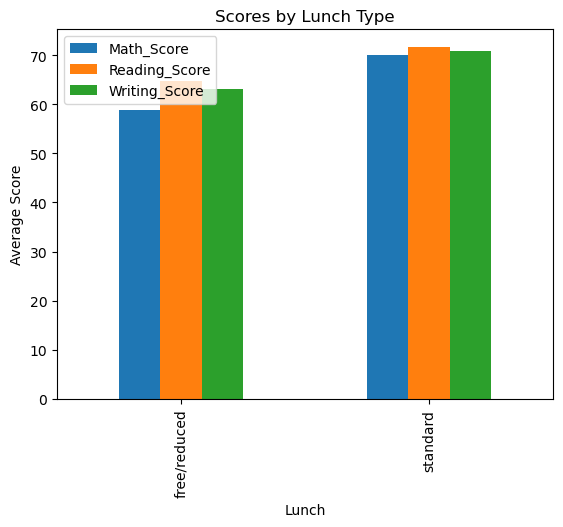

In [23]:
# 6. Lunch Type and Scores
plt.figure(figsize=(8, 5))
df.groupby("Lunch")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().plot(kind='bar')
plt.title("Scores by Lunch Type")
plt.ylabel("Average Score")
plt.show()

6. Lunch Type and Scores
 * Students with standard lunch consistently score higher than those with free/reduced lunch, possibly indicating socio-economic influence.

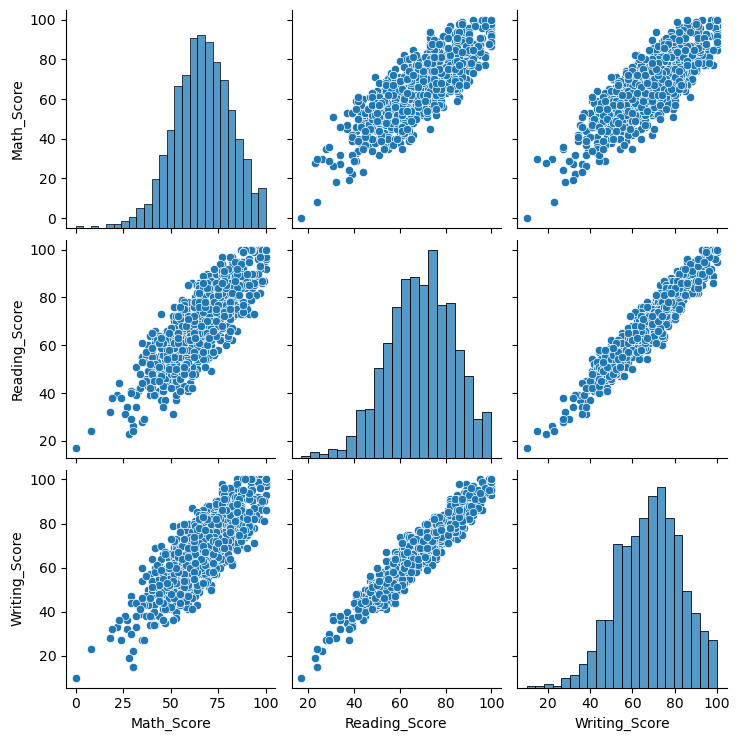

In [24]:
# 7. Pairplot of Scores
sns.pairplot(df[["Math_Score", "Reading_Score", "Writing_Score"]])
plt.show()

7. Pairwise Relationships
 * Strong positive relationships between all three scores.

 * Students who do well in one subject tend to do well in others.

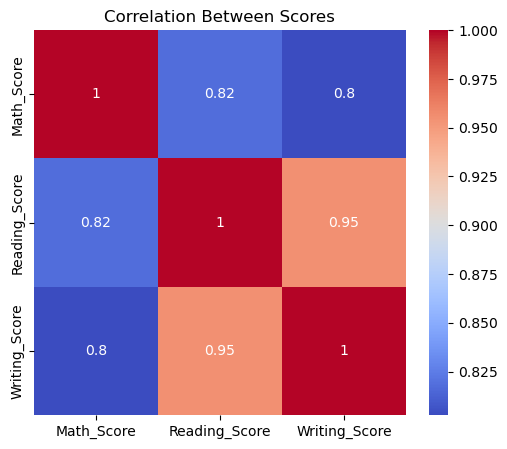

In [25]:
# 8. Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[["Math_Score", "Reading_Score", "Writing_Score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Scores")
plt.show()

8. Correlation Heatmap - Correlation between:

* Reading & Writing: 0.95 (very strong)

* Math & Reading: ~0.82

* Math & Writing: ~0.80

### Statistical test (t-test for difference in means)

In [26]:
from scipy import stats 
for subject in ['Math_Score', 'Reading_Score', 'Writing_Score']:
    male_scores = df[df['Gender'] == 'male'][subject]
    female_scores = df[df['Gender'] == 'female'][subject]
    t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
    print(f"{subject}: t-stat={t_stat:.2f}, p-value={p_val:.4f}")

Math_Score: t-stat=5.38, p-value=0.0000
Reading_Score: t-stat=-7.96, p-value=0.0000
Writing_Score: t-stat=-9.98, p-value=0.0000


Math Scores (t=5.38, p<0.001)

Males scored significantly higher in Math than females (strong statistical evidence).

The large positive t-statistic (5.38) means the male average was much higher.

Reading Scores (t=-7.96, p<0.001)

Females scored significantly higher in Reading (negative *t* means female average > male).

Extremely small p-value suggests this difference is not due to chance.

Writing Scores (t=-9.98, p<0.001)

Females outperformed males even more strongly in Writing.

The t-statistic (-9.98) is the most extreme, indicating the largest gap.

### Correlation between education level and scores (ordinal encoding)

In [27]:
# Define education order for proper sorting
edu_order = ['some high school', 'high school', 'some college', 
             "associate's degree", "bachelor's degree", "master's degree"]

edu_map = {level: i for i, level in enumerate(edu_order)}
df['Parental_Education_Ordinal'] = df['Parental_Education'].map(edu_map)

for subject in ['Math_Score', 'Reading_Score', 'Writing_Score']:
    corr = df['Parental_Education_Ordinal'].corr(df[subject])
    print(f"Correlation between parental education and {subject}: {corr:.3f}")

Correlation between parental education and Math_Score: 0.159
Correlation between parental education and Reading_Score: 0.191
Correlation between parental education and Writing_Score: 0.237


While students with more educated parents tend to score slightly higher—especially in Writing—the effect is modest. Parental education alone explains less than 6% of score difference.|

### Chi-Square Test for Gender vs. Test Preparation

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Test_Preparation'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Test_Preparation  completed  none
Gender                           
female                  184   334
male                    174   308


### Chi-Square Test

In [30]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies (if no association):")
print(expected)


Chi2 Statistic: 0.02
P-value: 0.9008
Degrees of Freedom: 1

Expected Frequencies (if no association):
[[185.444 332.556]
 [172.556 309.444]]


No Significant Association Found

The p-value (0.9008) is much greater than 0.05, indicating no statistically significant relationship between gender and test preparation participation.

Nearly Identical Participation Rates

Females: 35.5% (184/518) completed test prep.

Males: 36.1% (174/482) completed test prep.

The difference is negligible.

Chi-Square Statistic (0.02) Confirms Random Variation

A value this close to zero means observed data almost perfectly matches expected frequencies under independence.

There is no evidence that male and female students differ in their likelihood of completing test preparation.

### Measure Variability (Standard Deviation)

In [31]:
std_scores = df[['Math_Score', 'Reading_Score', 'Writing_Score']].std()
print("\nStandard Deviations (Higher = More Variable):")
print(std_scores)


Standard Deviations (Higher = More Variable):
Math_Score       15.163080
Reading_Score    14.600192
Writing_Score    15.195657
dtype: float64


"All three subjects exhibit comparable score variability, suggesting no systemic differences in consistency of student performance across Math, Reading, and Writing."